# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.003
-0.003
-0.003
-0.003
-0.003
0.0
-0.002
-0.003
-0.003
1.002
1.002
1.0
1.002
1.998
2.002
2.002
2.001
2.0
2.968
2.97
2.971
2.971
2.971
3.94
3.944
3.944
3.944
3.945
4.916
4.917
4.918
4.918
4.918
5.892
5.895
5.895
5.895
6.42
6.422
6.423
6.423
6.423
6.954
6.952
6.952
7.951
7.956
7.956
7.955
7.955
8.953
8.953
8.957
8.956
8.956
8.956
9.958
9.957
9.957
10.954
10.96
10.96
10.958
10.958
11.956
11.961
11.961
11.96
11.96
12.958
12.963
12.963
12.962
12.962
13.959
13.962
13.963
13.963
13.963
14.476
14.481
14.48
14.48
14.966
14.969
14.969
14.968
14.968
15.972
15.972
15.971
15.97
16.969
16.973
16.973
16.972
16.973
17.969
17.975
17.974
17.972
17.974
18.971
18.976
18.976
18.975
18.976
19.977
19.977
19.976
19.976
20.973
20.977
20.977
20.976
20.977
21.763
21.762
21.762
21.762
22.54
22.539
22.537
22.539
23.541
23.541
23.54
23.54
24.544
24.543
24.542
24.542
25.545
25.545
25.544
25.543
26.547
26.547
26.545
26.545
27

56.362
56.362
56.362
56.442
56.442
56.442
56.505
56.505
56.505
56.505
56.553
56.553
56.553
56.552
56.552
56.552
56.552
56.552
56.551
56.553
56.552
56.552
56.552
56.551
56.55
56.55
56.55
56.55
56.55
56.55
56.549
56.549
56.548
56.548
56.548
56.548
56.548
56.547
56.547
56.547
56.547
56.547
56.547
56.547
56.547
56.547
56.547
56.547
56.547
56.547
56.547
56.546
56.546
56.546
56.546
56.545
56.545
56.544
56.891
56.892
56.892
56.891
56.891
56.89
56.89
56.889
56.889
56.889
56.889
56.889
56.889
56.889
56.889
56.888
56.888
56.888
56.888
56.887
56.887
56.887
56.886
56.886
56.886
56.886
56.886
56.886
56.886
56.886
56.886
56.886
56.886
56.886
56.886
56.886
56.886
56.885
56.885
56.885
56.885
56.883
57.185
57.185
57.185
57.185
57.185
57.184
57.184
57.186
57.185
57.184
57.184
57.184
57.184
57.184
57.183
57.183
57.183
57.183
57.183
57.183
57.183
57.182
57.182
57.182
57.182
57.182
57.182
57.18
57.18
57.18
57.18
57.18
57.18
57.18
57.18
57.18
57.181
57.181
57.179
57.179
57.18
57.18
57.179
57.179
57.178
57.5

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1466,2932,60.226
1467,2934,60.226
1468,2936,60.225
1469,2938,60.224


<IPython.core.display.Javascript object>


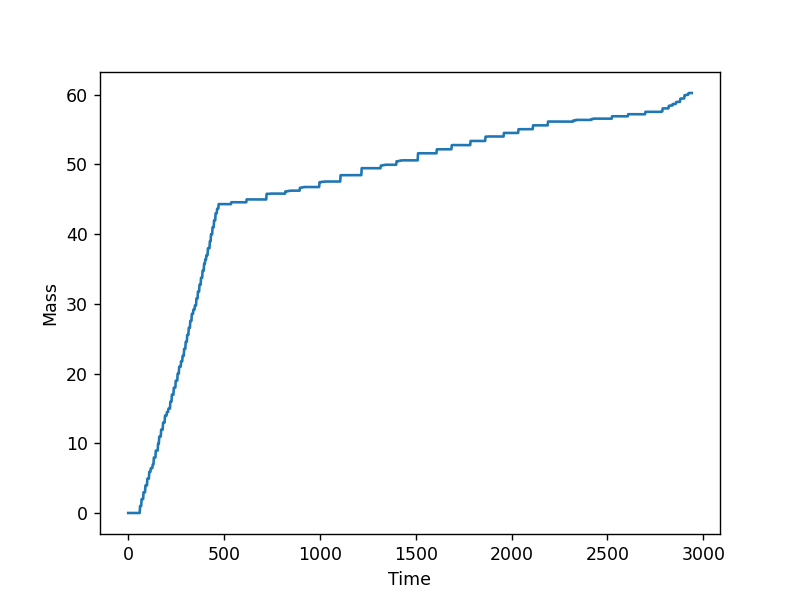

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_090523_S403-408.csv')